# Ultralytics Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [1]:
# !cd ~/git/Vancouver-Watching; pip3 install -e .

In [12]:
import os

from abcli import file
from abcli import fullname
from abcli.modules import objects
from abcli import string
from abcli.plugins import seed
from vancouver_watching.ai.classes import Ultralytics_API
import matplotlib.pyplot as plt

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

abcli-7.2443.1-2023-06-aws-batch-a, built on 04 November 2023, 21:52:31


In [3]:
object_name = f"2023-11-04-21-42-46-47839"
object_path = objects.object_path(object_name)

In [4]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli download object $object_name

2023-11-04-21-42-46-47839 open download started.
2023-11-04-21-42-46-47839 download completed.


---

In [5]:
ultralytics_api = Ultralytics_API("R6nMlK6kQjSsQ76MPqQM", verbose=True)

Ultralytics_API.url: https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM


In [6]:
image_filename = os.path.join(object_path, "georgiaE.jpg")

In [7]:
metadata = ultralytics_api.infer(image_filename)

car: 9, traffic light: 2


{
  "data": [
    {
      "box": {
        "x1": 321.540283203125,
        "x2": 369.6844482421875,
        "y1": 262.485107421875,
        "y2": 313.20538330078125
      },
      "class": 2,
      "confidence": 0.8634600639343262,
      "name": "car"
    },
    {
      "box": {
        "x1": 466.79656982421875,
        "x2": 523.67919921875,
        "y1": 239.4763946533203,
        "y2": 272.21044921875
      },
      "class": 2,
      "confidence": 0.8466967344284058,
      "name": "car"
    },
    {
      "box": {
        "x1": 300.01904296875,
        "x2": 343.91162109375,
        "y1": 228.07940673828125,
        "y2": 274.6824951171875
      },
      "class": 2,
      "confidence": 0.8003149032592773,
      "name": "car"
    },
    {
      "box": {
        "x1": 372.1959533691406,
        "x2": 400.602783203125,
        "y1": 191.08795166015625,
        "y2": 212.73875427246094
      },
      "class": 2,
      "confidence": 0.7991554737091064,
      "name": "car"
    },
    {
  

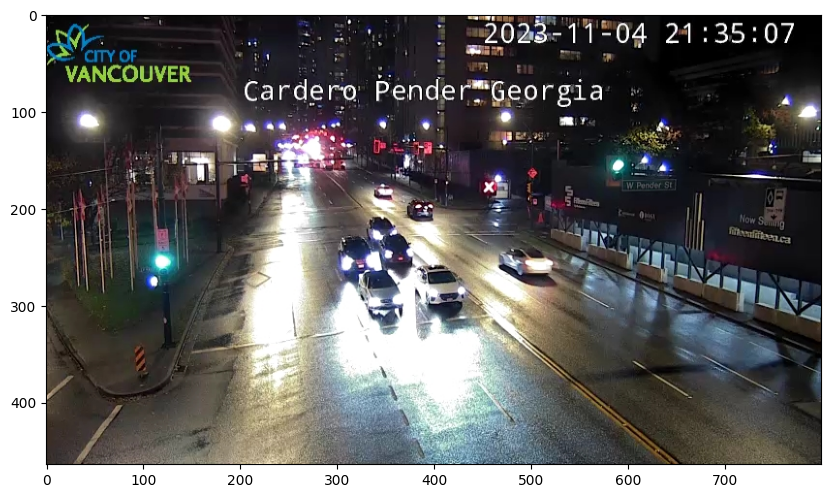

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(file.load_image(image_filename)[1])
plt.show()

---

In [8]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

📂 abcli: 2023-11-04-21-42-46-47839


2023-11-04-21-42-46-47839 += #built_by_notebook.


confirmed: 2023-11-04-21-42-46-47839 does not exist.
2023-11-04-21-42-46-47839 open upload started.


2023-11-04-21-42-46-47839 += #open.


In [9]:
seed.log(object_name)

abcli select 2023-11-04-21-42-46-47839; open .


In [10]:
# END